# Dojo Graph Theory

Since 20.01.2021 Joe Biden is the new president of the United States. In this Dojo, however, we want to travel back in time and get to understand the Trump universe a little bit better (at least how it was back in 2018 - as you know a lot has changed since then ;-))

To be a little bit more precise, we will look at the key people affiliated to Donald Trump how they are connected to him and to each other.

# Preparation

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/trump/trump-edges.csv')

In [2]:
df.head(2)

Source           Target  Weight  \
0      Paul Teller  Donald J. Trump       1   
1  Donald J. Trump        Joe Hagin       1   

                           Relationship  \
0                     Special assistant   
1  Deputy chief of staff for operations   

                                            Citation  
0  https://www.documentcloud.org/documents/353434...  
1  http://www.cnn.com/2017/01/04/politics/bill-st...

In [3]:
df[df['Source'].str.contains('Giu')]

Source       Target  Weight  \
249  Rudy Giuliani   Ken Kurson       1   
250  Rudy Giuliani  Wilbur Ross       1   

                                      Relationship  \
249           Worked on 2008 presidential campaign   
250  Privatization advisor when Giuliani was mayor   

                                              Citation  
249  http://nymag.com/daily/intelligencer/2017/01/j...  
250  http://www.salon.com/2016/11/21/wilbur-ross-jr...

# Dojo Start

**Task:** Create an undirected, unweighted network based on the *Source* and *Target* column in the dataset

In [7]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'Source', 'Target')

**Task:** Visualize the network with a graph. For the sake of readability, don't use labels. Make sure the graph looks nice (small node sizes, perhaps some opacity, ...).

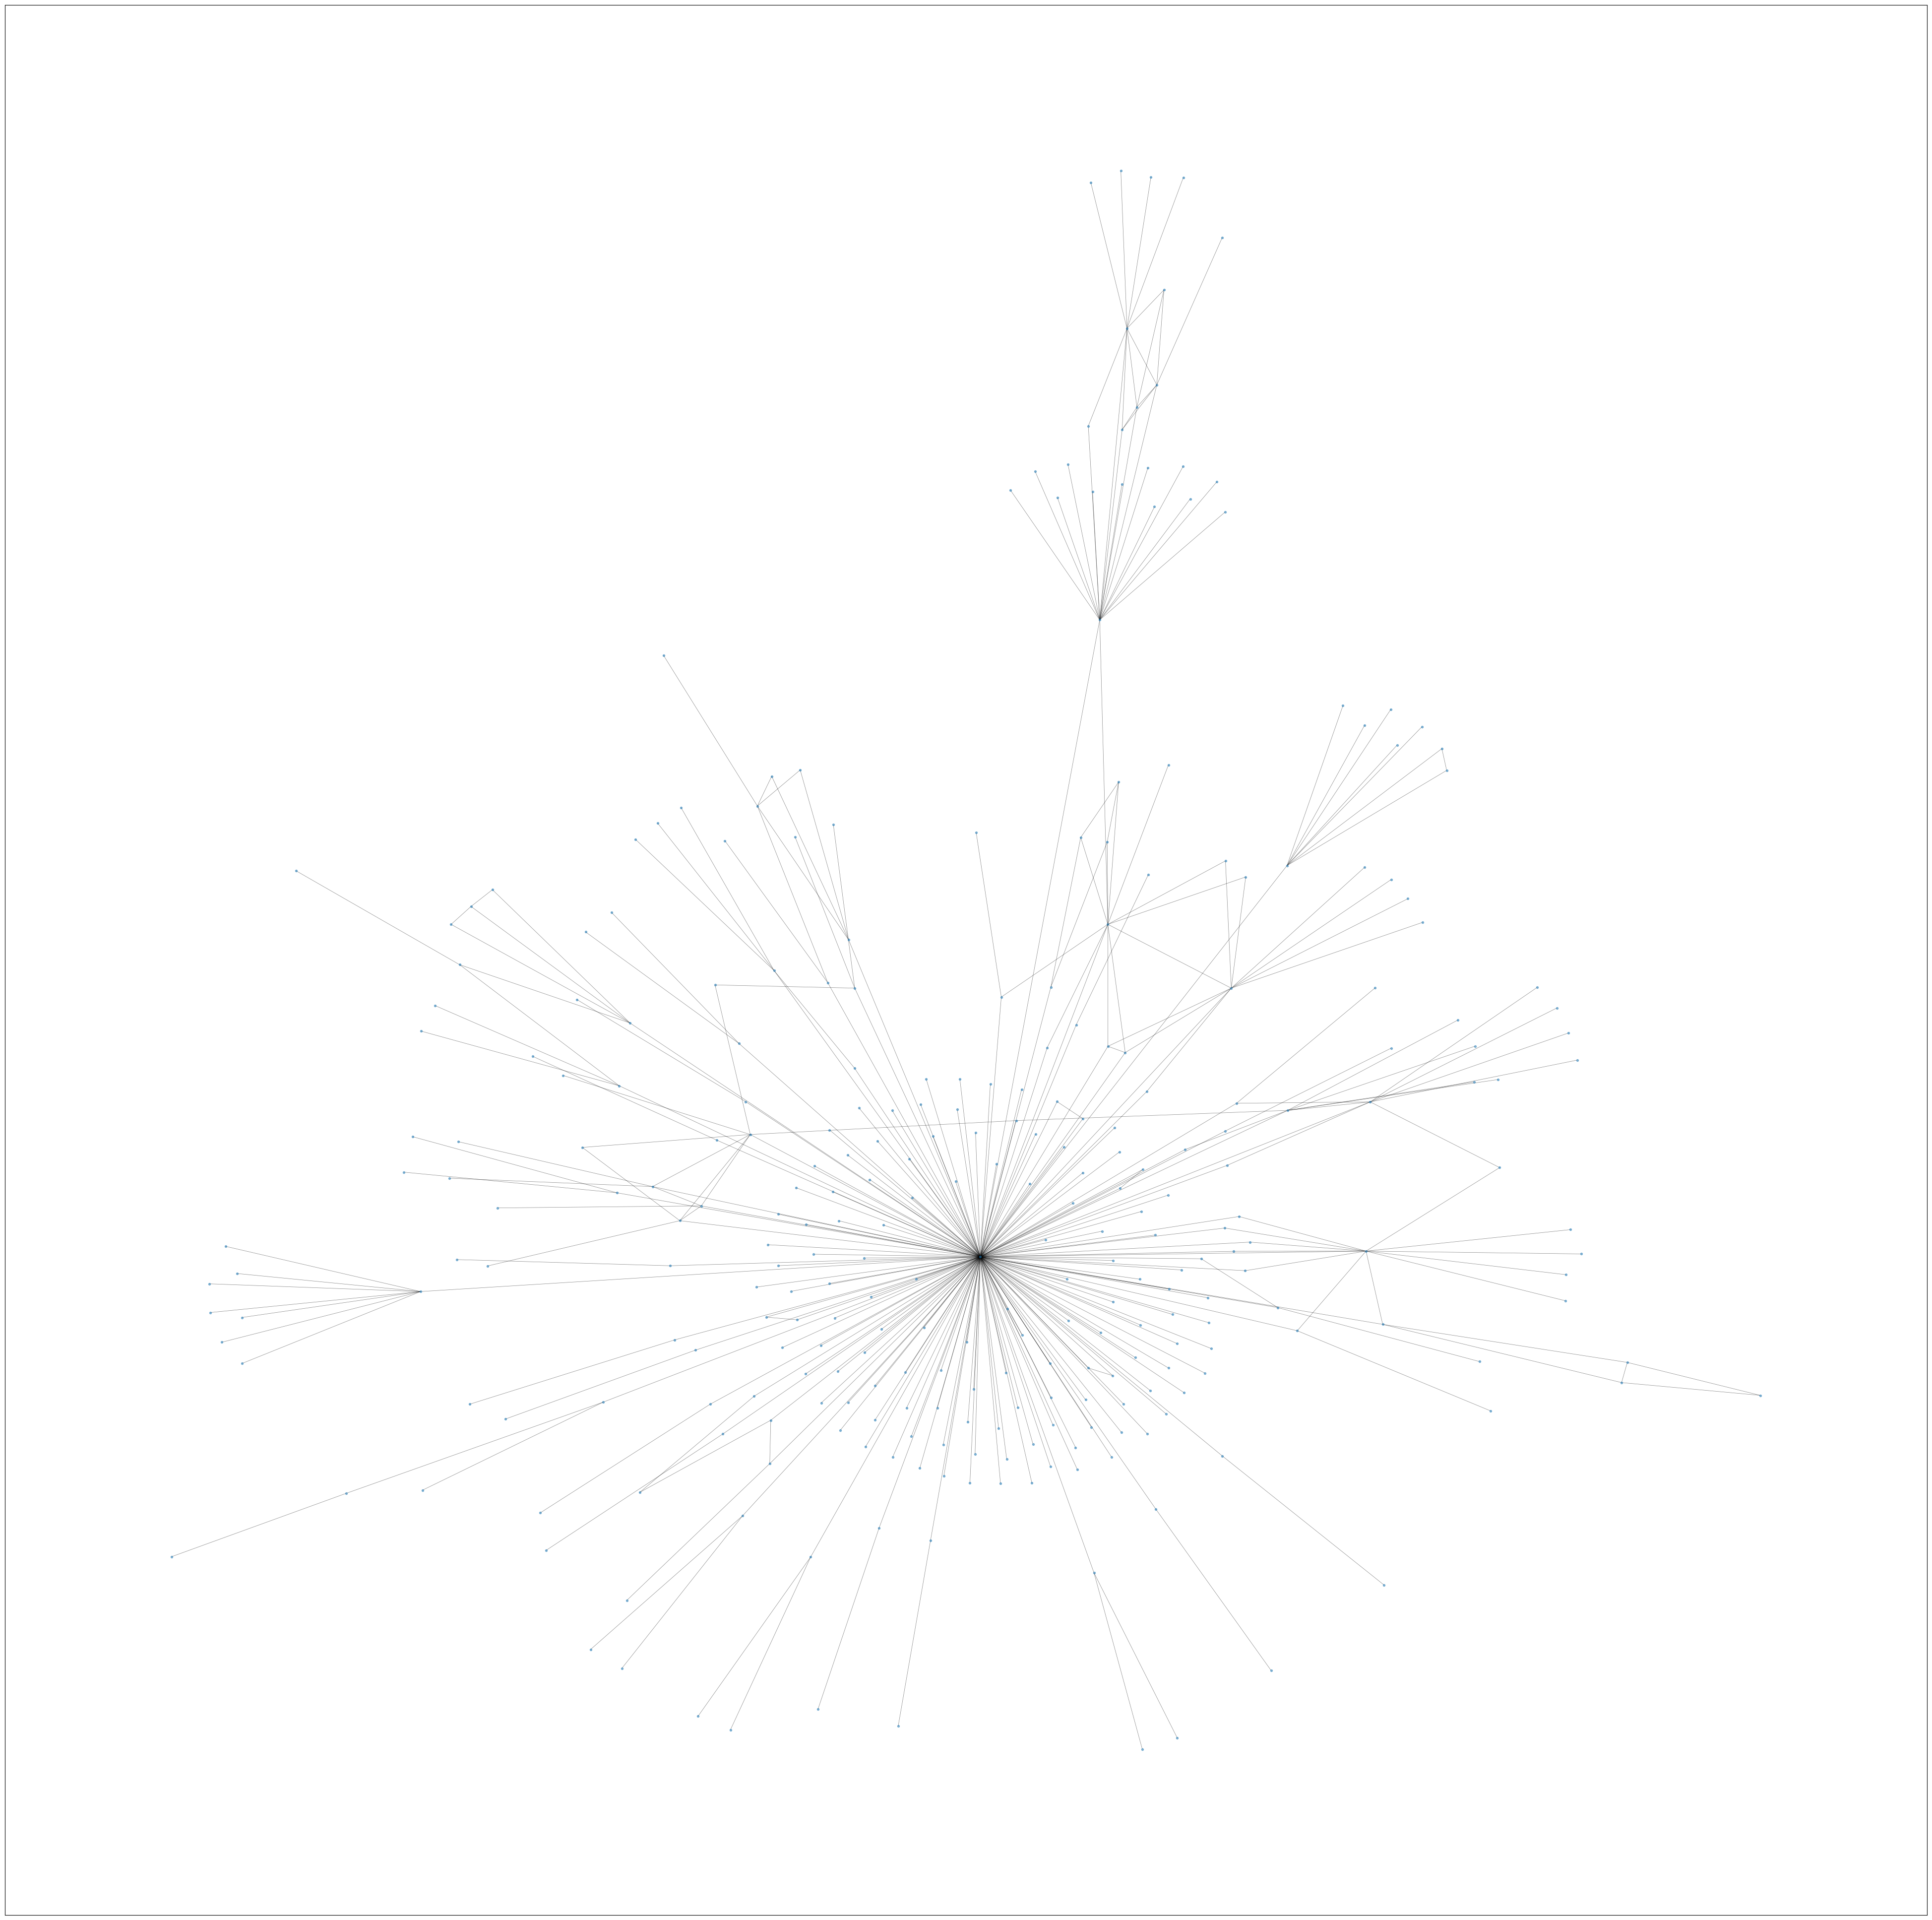

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50)) 
nx.draw_networkx(G, node_size=8, alpha=.5, width=.5, with_labels=False)
plt.show()

**Task:** Rank the people within the graph according to centrality measures. Feel free to use the measures you think will tell most about the graph, and add a few comments to interpret the results.

In [9]:
# compute closeness for all Trump Friends
closeness = nx.closeness_centrality(G)
df_closeness = pd.DataFrame(closeness.items(), columns=["Person", "Closeness_Centrality"])
df_closeness.sort_values(by = 'Closeness_Centrality', ascending=False).head(10)

Person  Closeness_Centrality
1     Donald J. Trump              0.700696
6       Jared Kushner              0.444772
74       Ivanka Trump              0.440233
161        Mike Pence              0.424754
77   Donald Trump Jr.              0.424157
35      Jeff Sessions              0.422969
45     Stephen Miller              0.421788
152        Don Mcgahn              0.420613
58      Paul Manafort              0.420613
145    Stephen Bannon              0.420613

**Task:** Both the graph and our knowledge of politics imply there must be several communities within a graph. In the cell below, use the Girvan-Newman algorithm to identify 5 communities.

In [10]:
from networkx.algorithms.community.centrality import girvan_newman

In [13]:
import itertools
k = 4

# use algortihm for building communities
community_gn = girvan_newman(G)

all_communities = []
for communities in itertools.islice(community_gn, k):
    tuple(sorted(c) for c in communities)
    len(communities)
    all_communities.append(communities)
    
comm_5 = all_communities[3]


**Task:** Print the size of each community.

In [14]:
for i, comm in enumerate(comm_5):
    print (f"Length of community {i+1} is {len(comm)}")

Length of community 1 is 254
Length of community 2 is 24
Length of community 3 is 9
Length of community 4 is 8
Length of community 5 is 8


**Task:** Pick one of the communities and print how many **edges** it contains.

*Hint:* You will need to extract a subgraph from the full network.

In [16]:
comm_first = comm_5[0]

# create a subgraph from the large graph by giving names of nodes
G_comm_first = G.subgraph(comm_first)
print(f"Number of edges: {G_comm_first.number_of_edges()}")

Number of edges: 303


**Task:** Find people with the **highest degree centrality** within each community. It will help us to identify the key players in Trump's network as well as possibly the role of each community. Make sure to indicate their **name** and **degree centrality score** to evaluate the extent of their importance.

In [17]:
highest_deg = []
for i, comm in enumerate(comm_5):
  g_comm = G.subgraph(comm)
  degree = nx.degree_centrality(g_comm)
  degree_sorted = [(k, v) for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)]
  highest_deg.append((i+1, degree_sorted[0][0], degree_sorted[0][1]))

for item in highest_deg:
  print(f'Person with highest degree centrality ({item[2]}) in community {item[0]} is {item[1]}.')

  

Person with highest degree centrality (0.7035573122529644) in community 1 is Donald J. Trump.
Person with highest degree centrality (0.7391304347826086) in community 2 is Jared Kushner.
Person with highest degree centrality (0.5) in community 3 is Elaine Chao.
Person with highest degree centrality (1.0) in community 4 is Paul Manafort.
Person with highest degree centrality (1.0) in community 5 is Don Mcgahn.


**Task:** We will assume that the bigger community led by Trump is his closer circle. Visualize it. Since we have fewer nodes, please include labels for a better interpretability

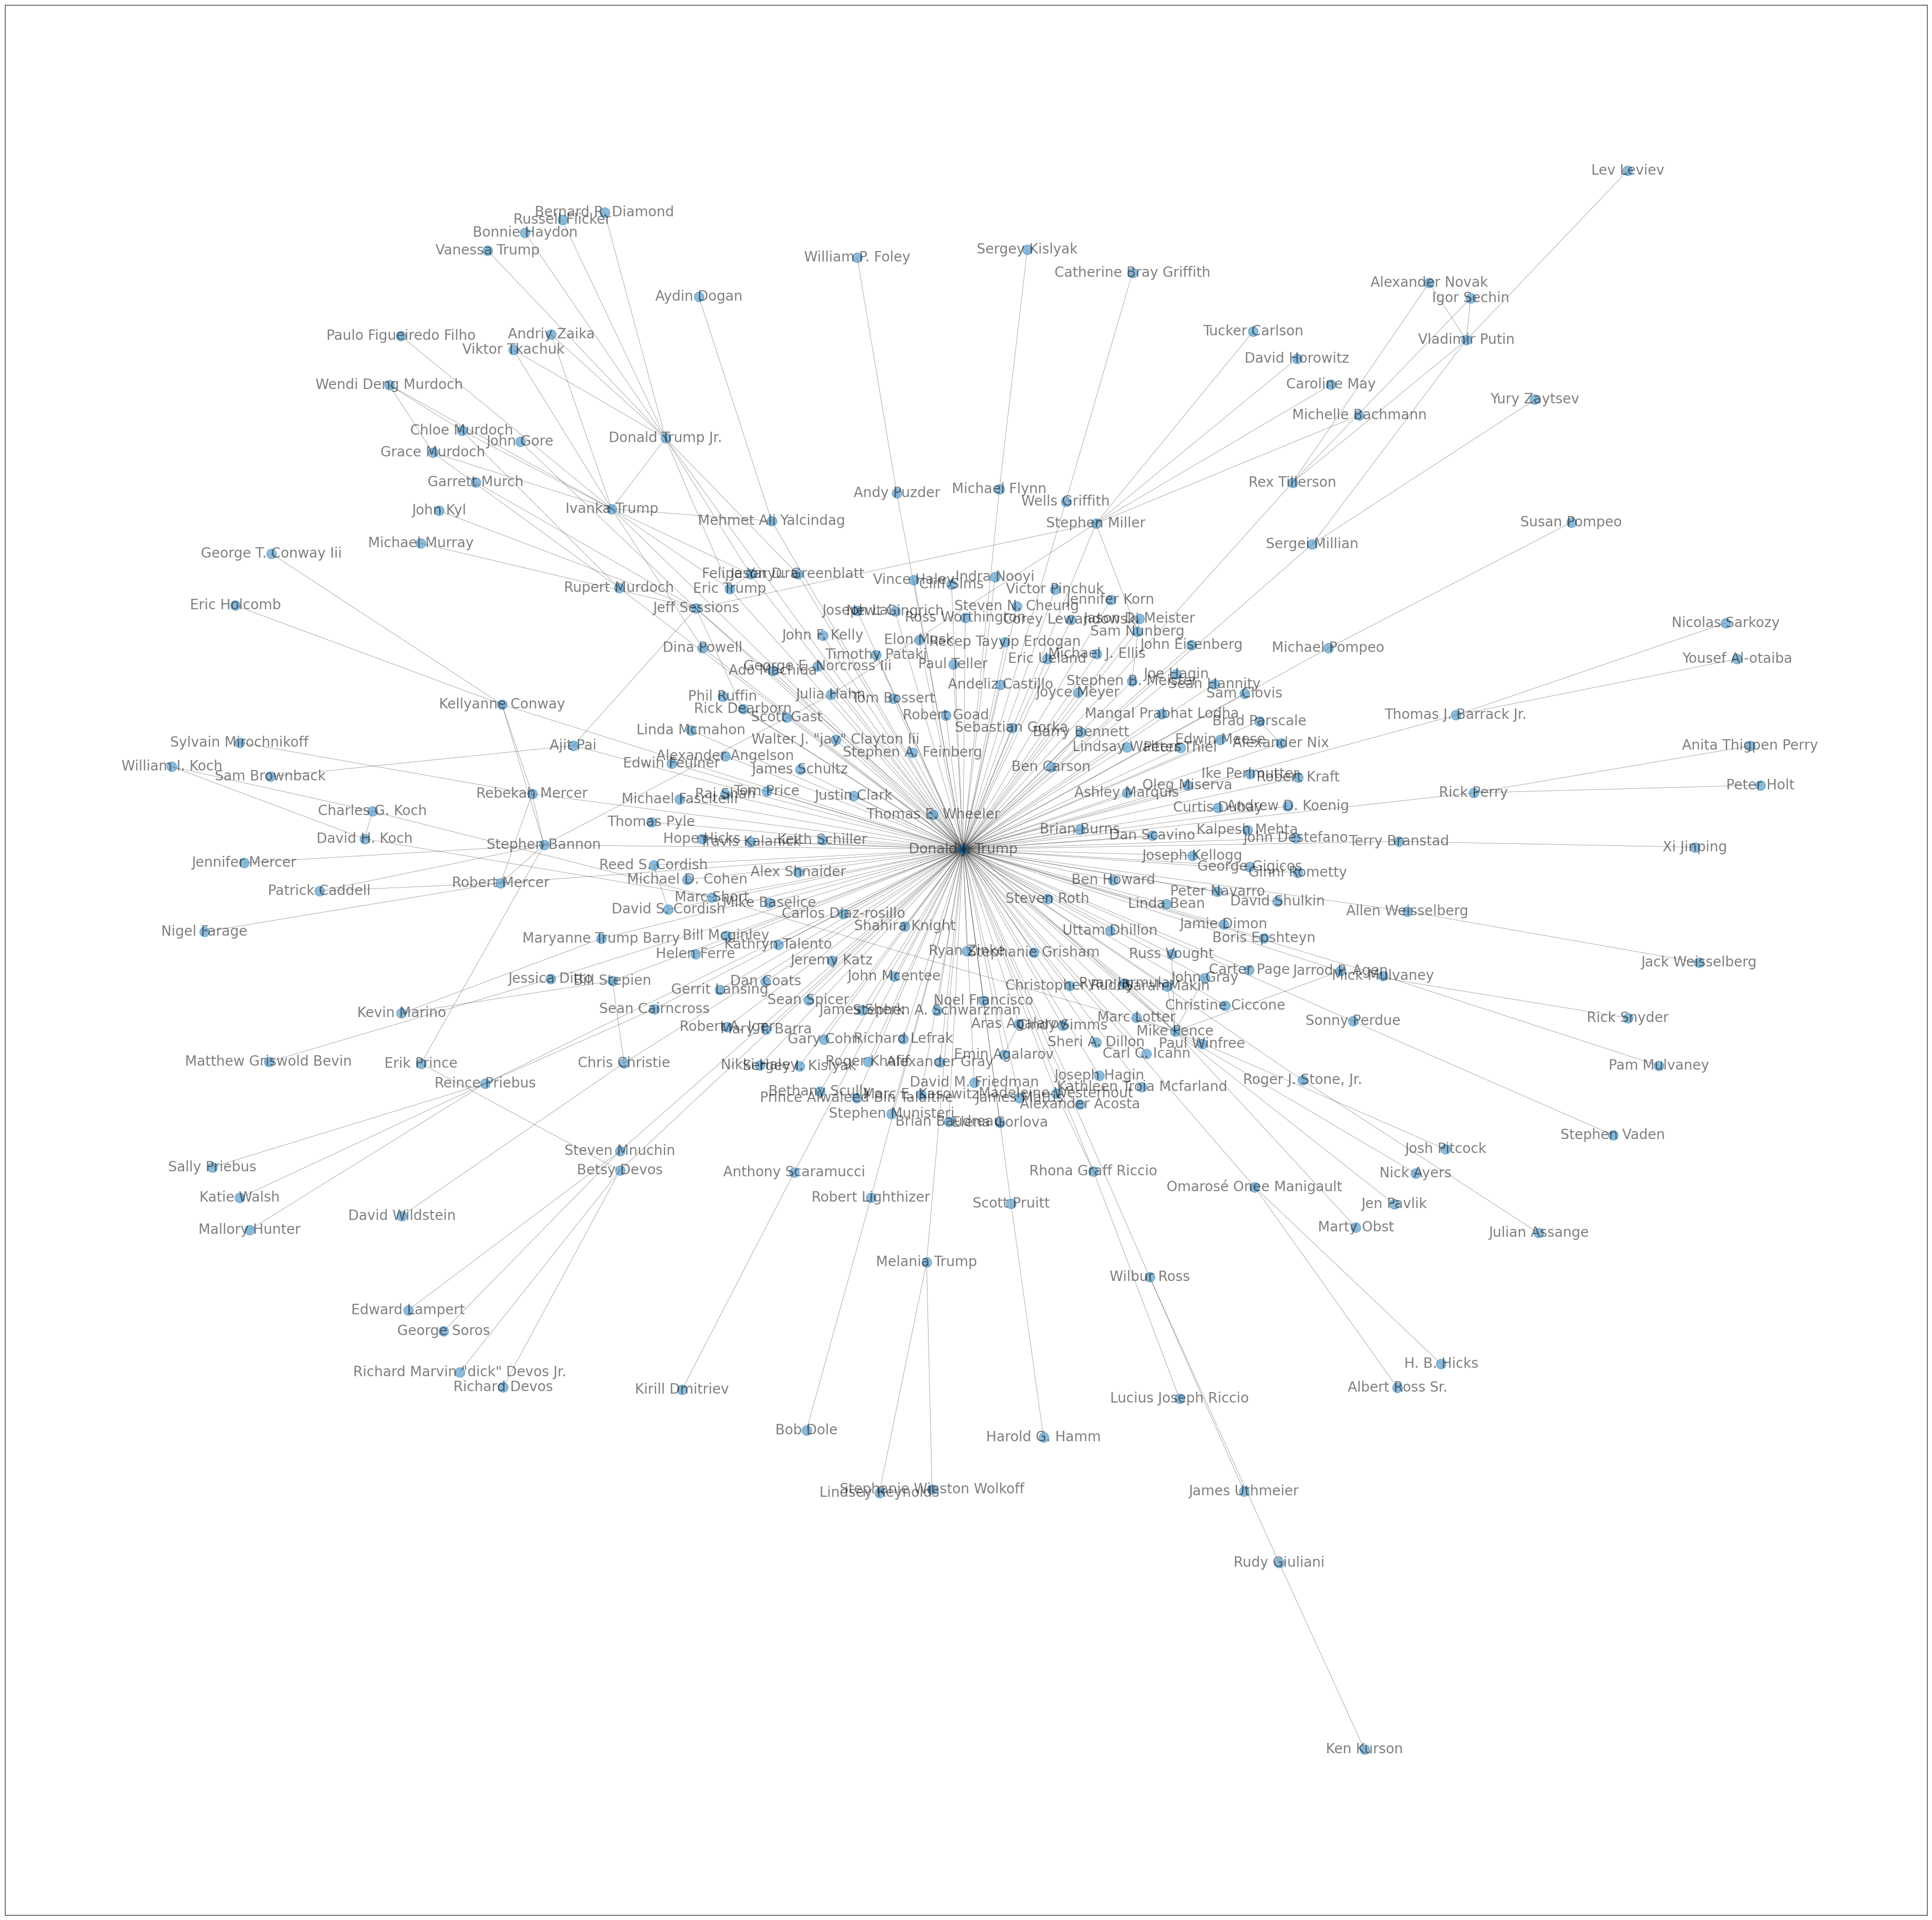

In [18]:
plt.figure(figsize=(50,50)) 
nx.draw_networkx(G.subgraph(comm_first), node_size=200, alpha=.5, width=.5, with_labels=True, font_size=20)
plt.show()

**Task:** Surprisingly, Trump's lawyer, Rudy Giuliani, seems to be not directly connected to him. At least that's what the graph shows. Find out if it's true and if so, who are the people connecting them.

In [19]:
from networkx.algorithms.shortest_paths.generic import shortest_path

shortest_path(G.subgraph(comm_first), source="Donald J. Trump", target="Rudy Giuliani")

['Donald J. Trump', 'Wilbur Ross', 'Rudy Giuliani']

**Task:** On the full graph, find the edge with the highest **edge betweenness** score, i.e. the edge that would be removed first, by girvan newman.

In [20]:
# compute betweeness for all Trump Friends 
betweenness = nx.edge_betweenness_centrality(G)
df_betweenness = pd.DataFrame(betweenness.items(), columns=["Person", "Edge_Betweenness_Centrality"])
df_betweenness.sort_values(by = 'Edge_Betweenness_Centrality', ascending=False).head(5)

Person  Edge_Betweenness_Centrality
5       (Donald J. Trump, Jared Kushner)                     0.140056
151        (Donald J. Trump, Don Mcgahn)                     0.051581
57      (Donald J. Trump, Paul Manafort)                     0.051581
76   (Donald J. Trump, Donald Trump Jr.)                     0.035692
34      (Donald J. Trump, Jeff Sessions)                     0.034176

**Task:** Remove Donald Trump from his network of associates.
- How many connected components does the new graph have?
- How large are these components?

In [59]:
G_no_trump = G.copy()

In [60]:
G_no_trump.remove_node('Donald J. Trump')

In [61]:
print("no Trump:", nx.number_connected_components(G_no_trump))
print("with Trump:", nx.number_connected_components(G))

no Trump: 146
with Trump: 1


In [ ]:
cn_comp = []
for i, com in enumerate(nx.connected_components(G_no_trump)):
  print(f"Component {i+1} length: {len(com)}")
  cn_comp.append((i+1, len(com), com))


**Task:** Plot the two largest connected components of this graph (incl. labels)

In [63]:
big_com1 = sorted(cn_comp, key=lambda x: x[1], reverse=True)[0][2]
big_com2 = sorted(cn_comp, key=lambda x: x[1], reverse=True)[1][2]

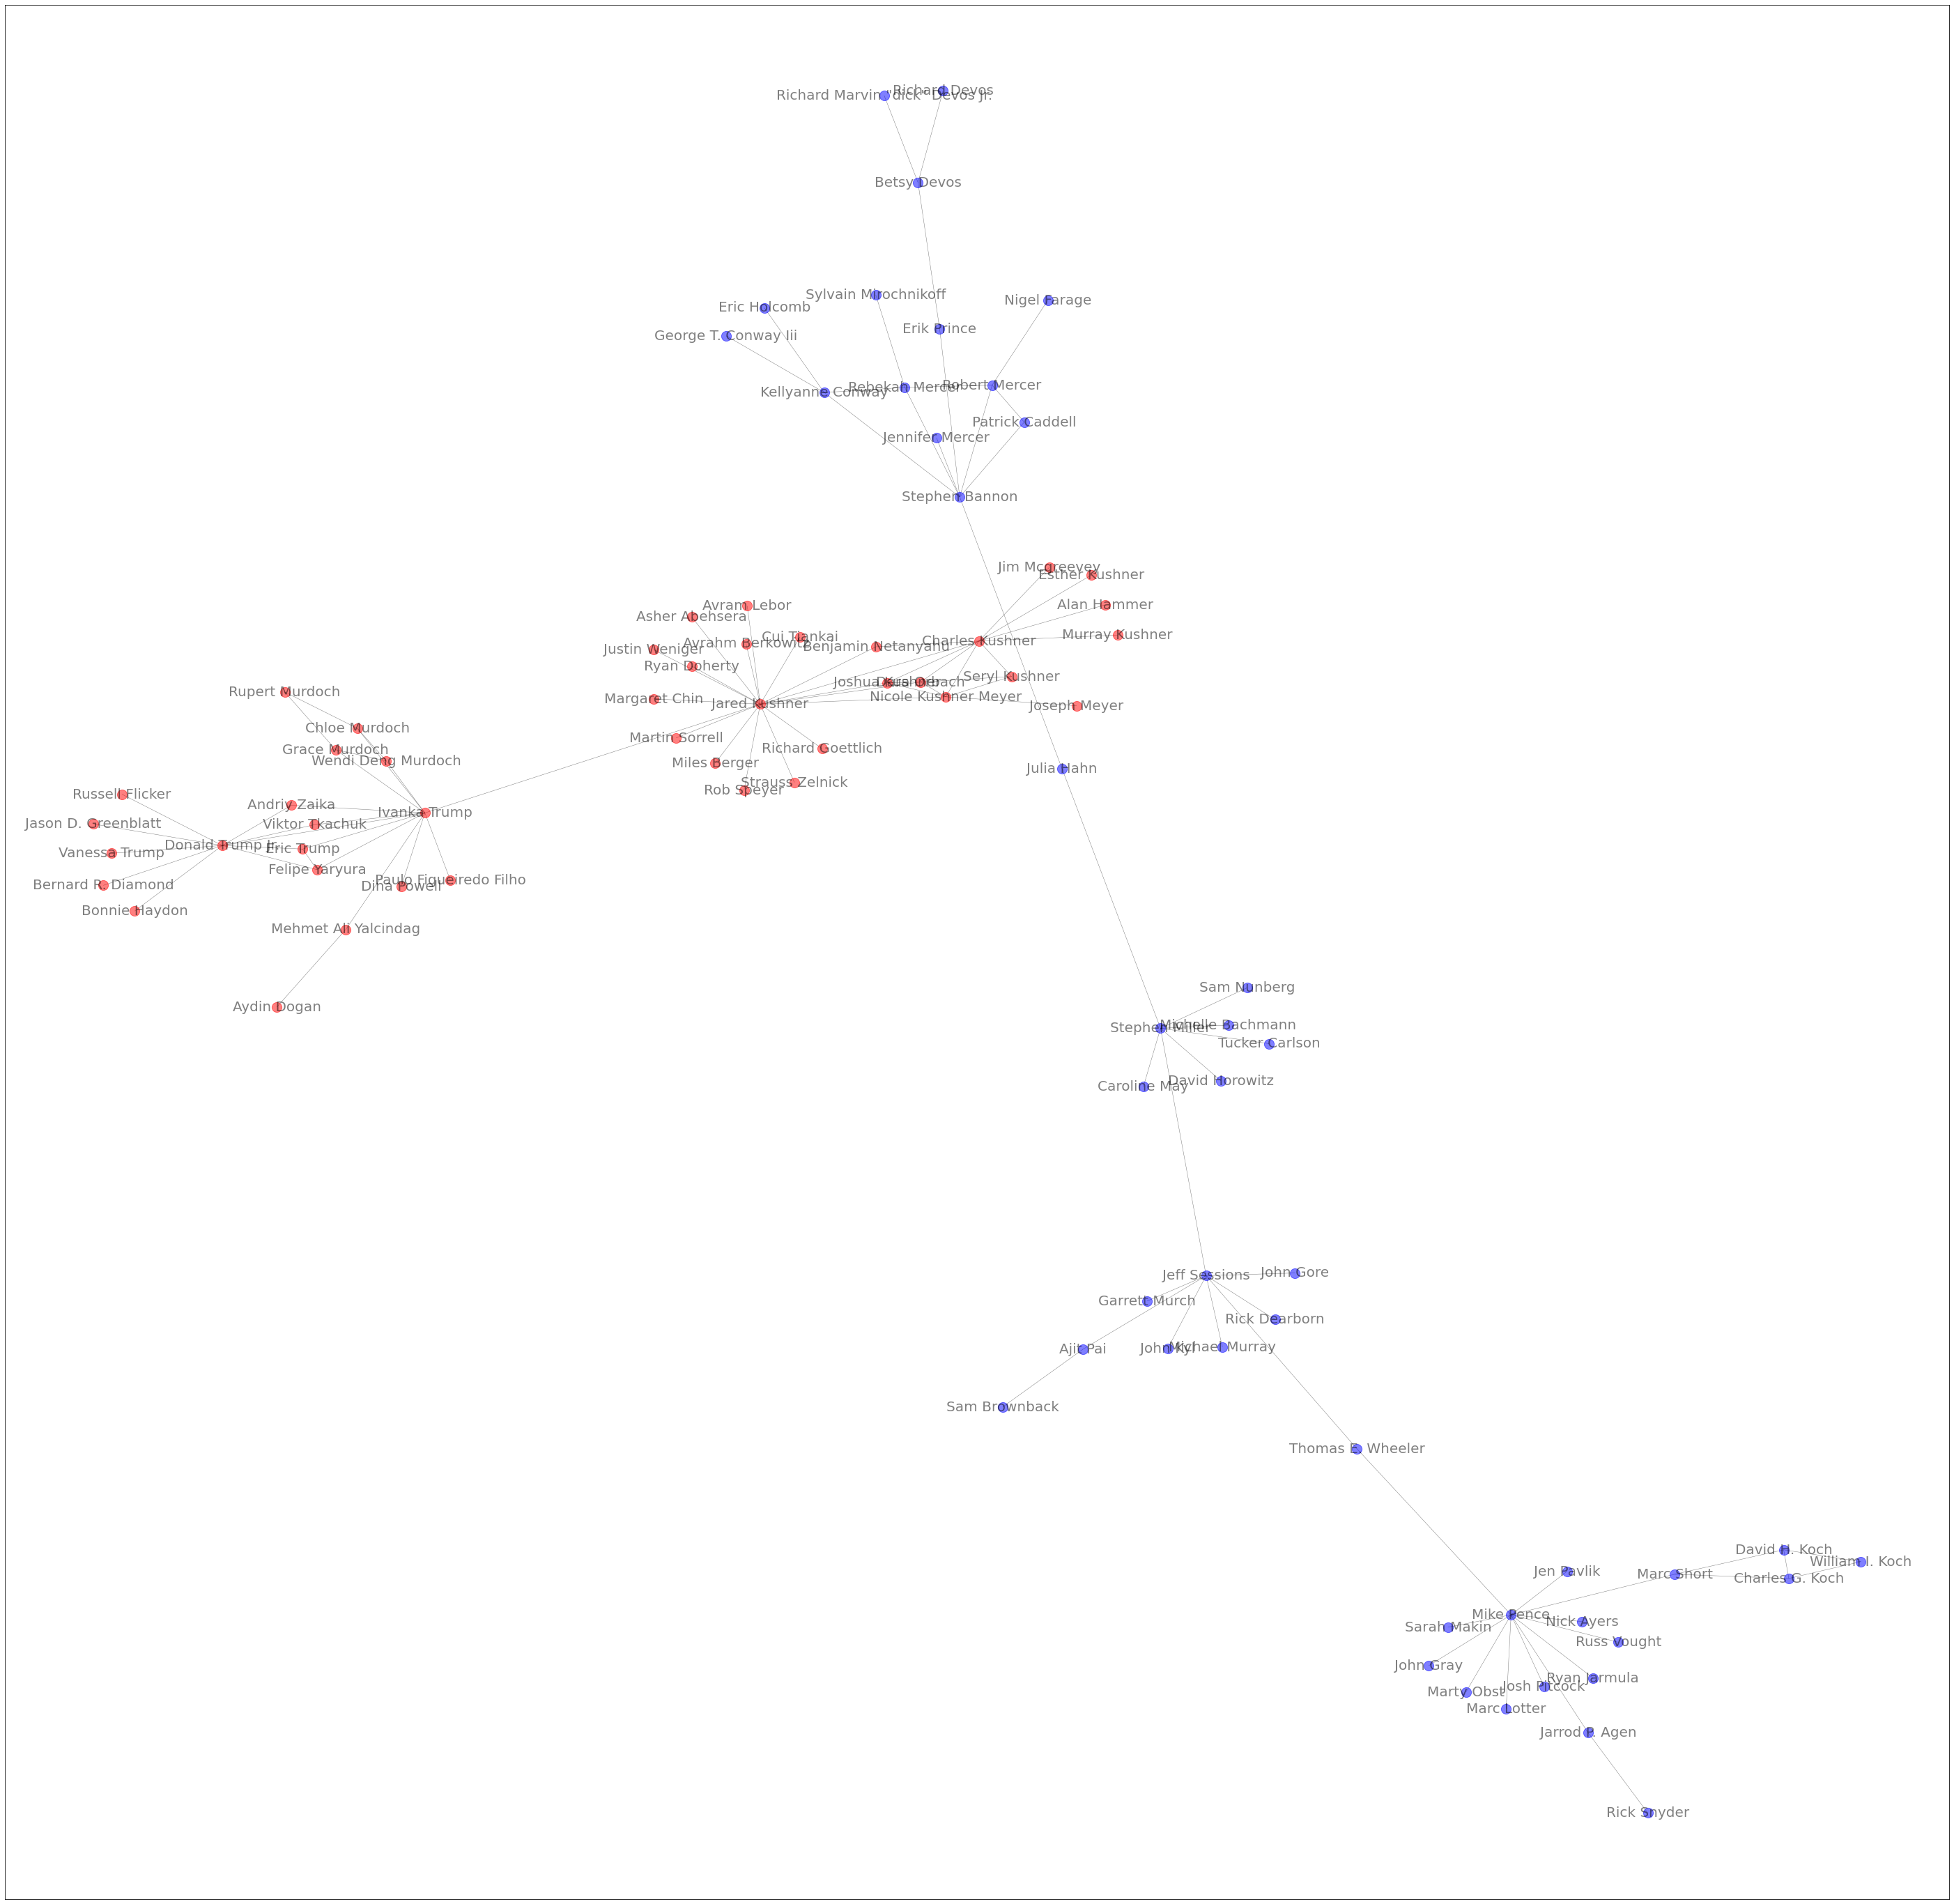

In [64]:
plt.figure(figsize=(50,50)) 
pos = nx.spring_layout(G_no_trump)
nx.draw_networkx(G_no_trump.subgraph(big_com1), node_size=200, alpha=.5, width=.5, with_labels=True, font_size=20, node_color='blue', pos=pos)
nx.draw_networkx(G_no_trump.subgraph(big_com2), node_size=200, alpha=.5, width=.5, with_labels=True, font_size=20, node_color='red',pos=pos)

plt.show()

Cool! :-) Those components are pretty thematic, they describe a large part of Trumps political network and his family, respectively.

**Task:** Get the subgraph of Trump's family from those components. We will continue with this subgraph only.

In [65]:
trump_family = big_com2

**Task:** Not everyone in Trump's family knows each other personally, but sometimes you might wonder why don't they, having so many "friends" in common. Predict 5 likeliest "frienships" to be formed in Trump's family.

*Hint:* Use an index of your choice.

In [68]:
pred = list(nx.adamic_adar_index(G_no_trump.subgraph(trump_family)))
pred_sorted = sorted(pred, key=lambda x: x[2], reverse=True)
pred_sorted[:5]

[('Chloe Murdoch', 'Grace Murdoch', 2.7553638718976456),
 ('Ivanka Trump', 'Rupert Murdoch', 1.8204784532536746),
 ('Wendi Deng Murdoch', 'Rupert Murdoch', 1.8204784532536746),
 ('Jared Kushner', 'Seryl Kushner', 1.6137400430141107),
 ('Seryl Kushner', 'Joshua Kushner', 1.6137400430141107)]

**Bonus:** Plot the family network again, but this time, draw the 5 predicted friends edges as well, in green.

*Hint:* You will have to fix the layout of the graph in a pos dictionary to draw the additional edges in a different color.

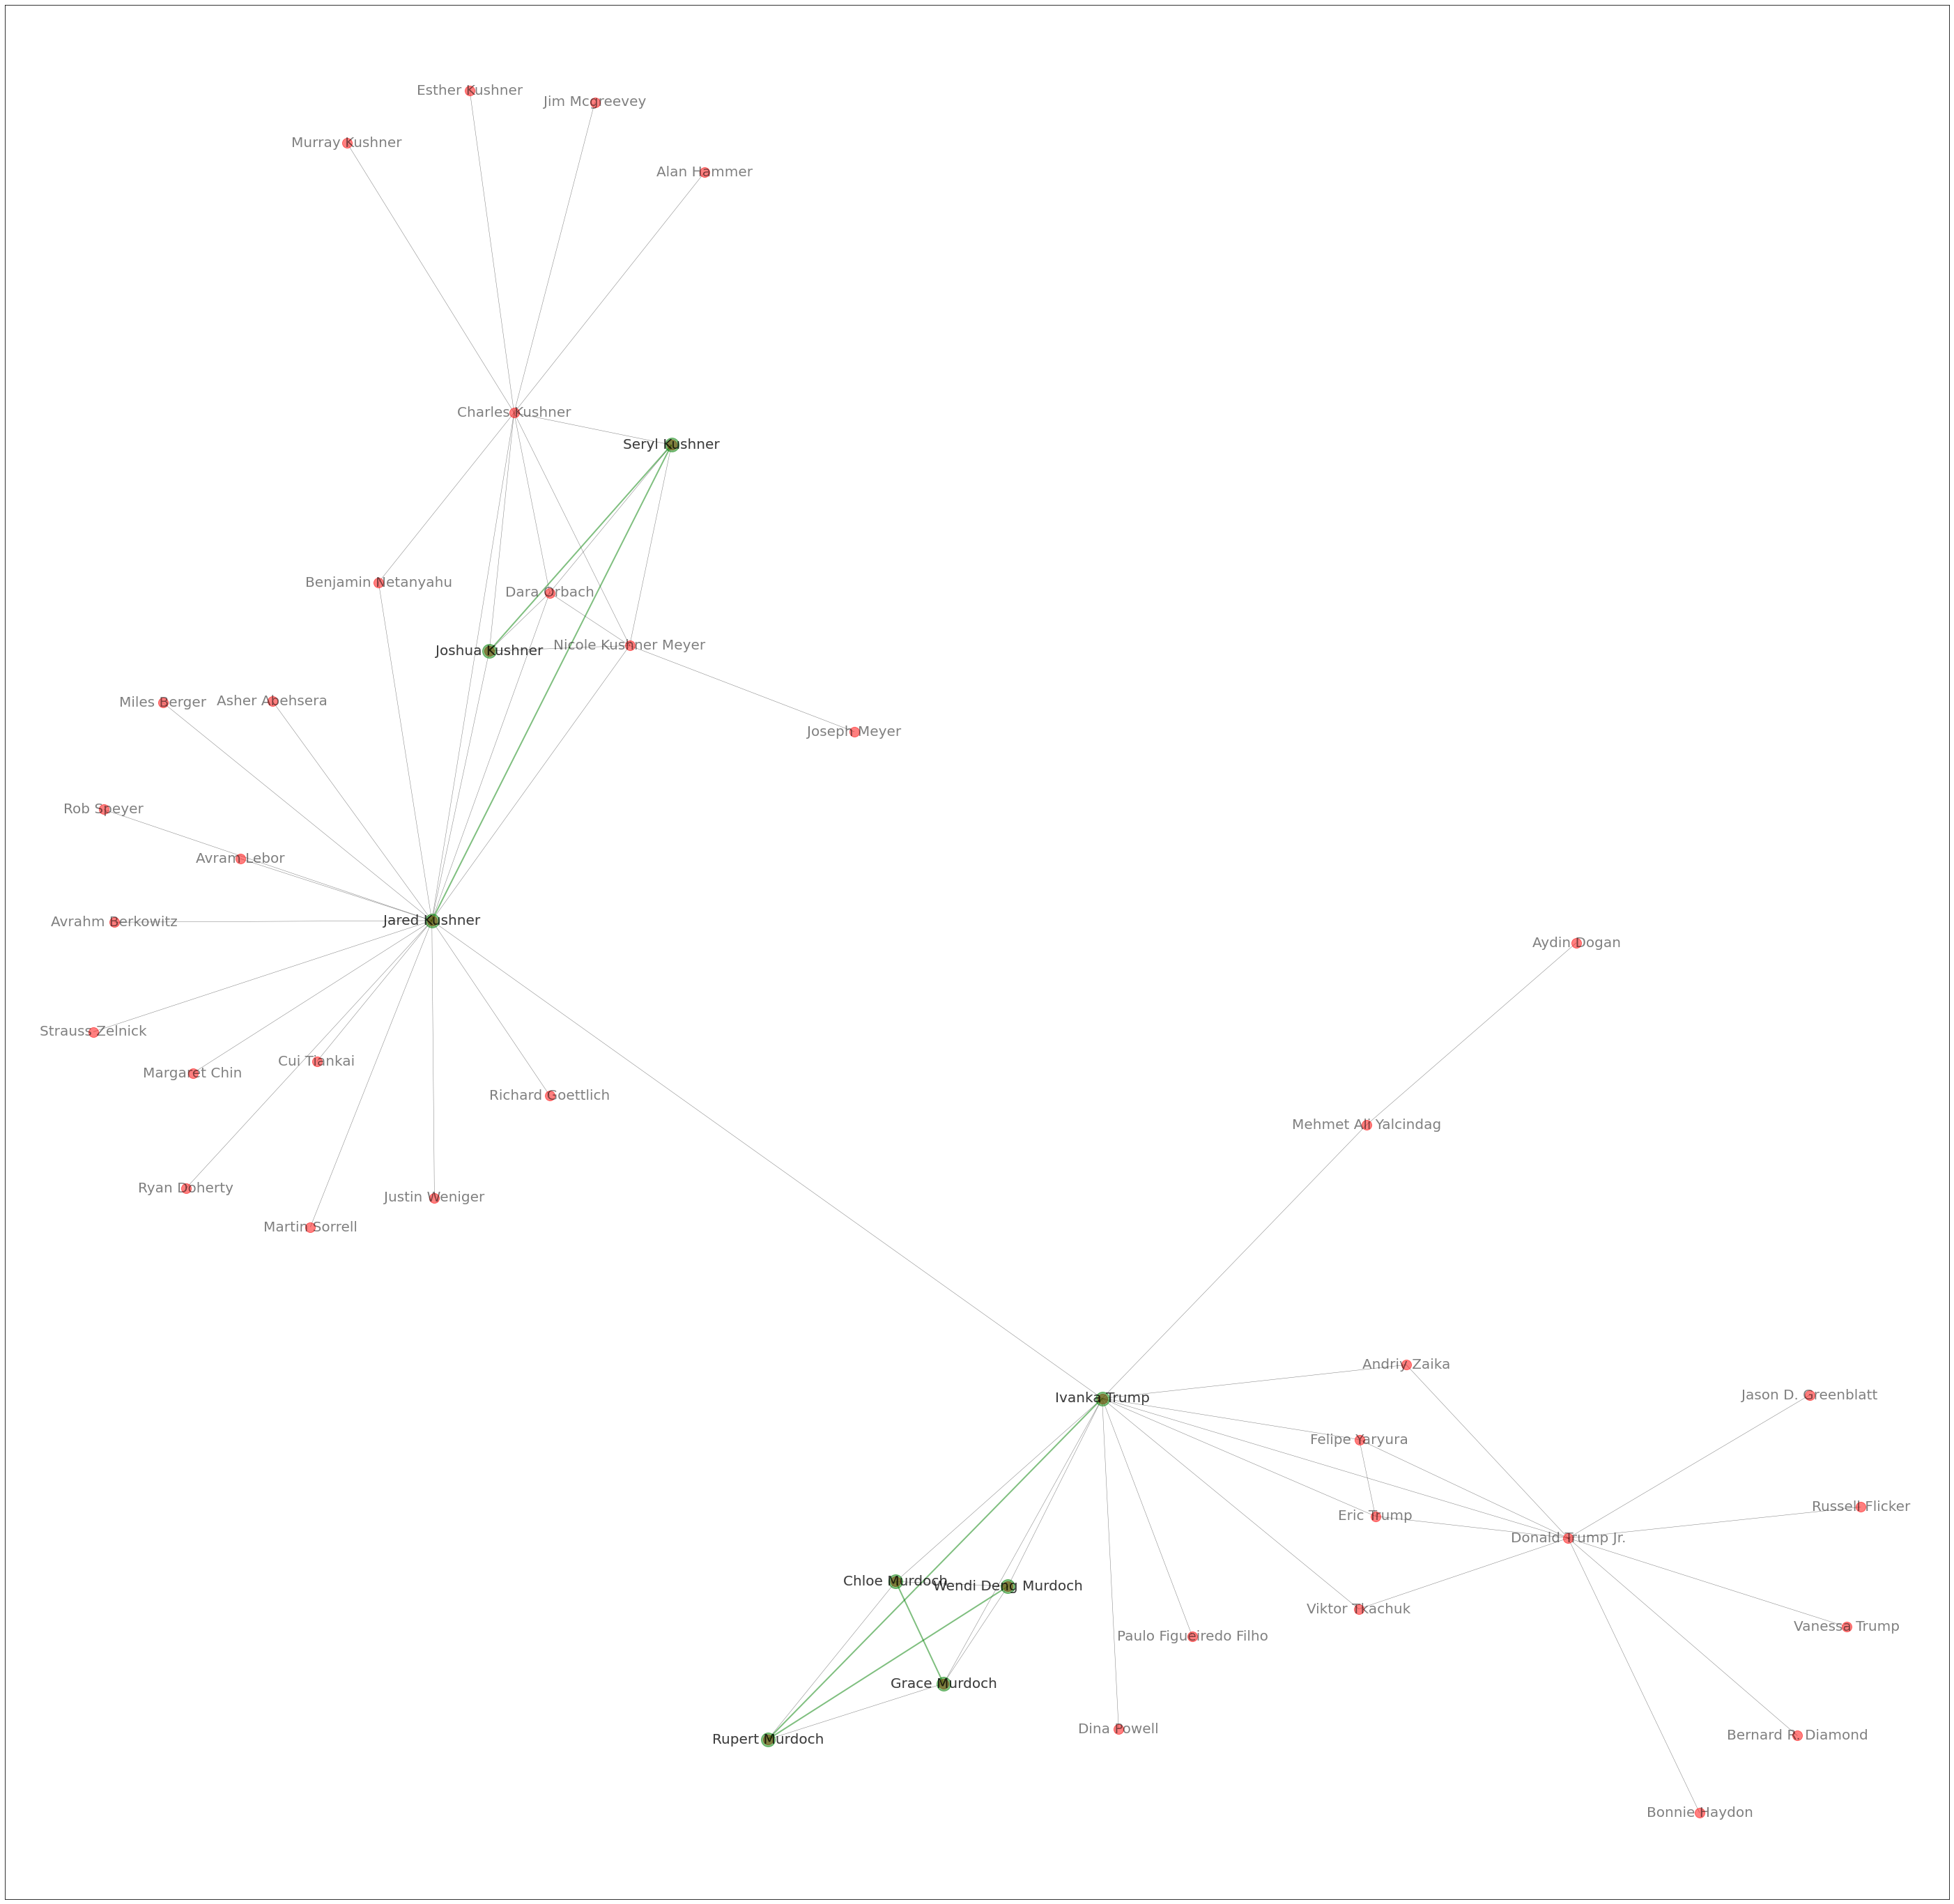

In [83]:
friend_edges = [(u, v) for u, v, s in pred_sorted[:5]]
friend_edges

new_friends = nx.empty_graph()
new_friends.add_edges_from(friend_edges)

plt.figure(figsize=(50,50)) 
pos = nx.spring_layout(G_no_trump.subgraph(trump_family))
nx.draw_networkx(G_no_trump.subgraph(trump_family), node_size=200, alpha=.5, width=.5, with_labels=True, font_size=20, node_color = 'red', pos=pos)
nx.draw_networkx(new_friends, node_size=400, alpha=.5, width=2., edge_color = 'green', with_labels=True, font_size=20, node_color = 'green', pos=pos)

plt.show()

Cool, the new friendships are at least within what seems to be sub-communities, and we did not predict Vanessa Trump to be friends with Joseph Meyer.